In [214]:
%matplotlib inline

In [215]:
import noise
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from random import randint
from math import *
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    background-color: #f5f8fc;
}
</style>
""")

# Subject: Perlin Noise
### Explored by: Tihomir Todorov 
The goal of this sample project is to explore what Perlin Noise is, how does it work and what are the implementations that is has. I will be trying different approaches to recreate the famous algorithm. 

# Table of Contents`
1. [Introduction](#introduction)
    1. [What is Perlin noise?](#what_is_perlin)
    2. [Use Cases](#use_cases)
3. [Testing the code](#code)
    1. [Perlin 1D](#perlin_1d)
    2. [Perlin 2D](#perlin_2d)
    3. [Perlin 3D](#perlin_3d)
4. [Resources](#resources)

## 1. Introduction <a name="introduction"></a>

<a name="what_is_perlin"></a>
### A. So what is Perlin noise? 

Ken Perlin developed the noise function while working on the original Tron movie in the early 1980s; he used it to create procedural textures for computer-generated effects. In 1997, Perlin won an Academy Award in technical achievement for this work.

[Perlin noise](https://en.wikipedia.org/wiki/Perlin_noise) can be used to generate various effects with natural qualities, such as clouds, landscapes, and patterned textures like marble.Perlin noise has a more organic appearance because it produces a naturally ordered (“smooth”) sequence of pseudo-random numbers.


<a href="https://imgur.com/UOdBzVi"><img src="https://i.imgur.com/UOdBzVi.png" style="width:700px" title="source: imgur.com" /></a>
__As you can see, the figure above shows us how Perlin noise can be used to generate a "controlled" form of randomness.__

<a name="perlin_vs_random"></a>
### B. Use Cases

| Simulating handwriting (1D)| Generating texture of a surface (2D)| Generating terrain (3D)|
| :-------------------------: | :-----------------------------------: | :--------------: |
|  **A normal straigth square**  |      **2D generated map texture**       | **3D generated terrain** |
|<a href="https://imgur.com/g7Dh1h5"><img src="https://i.imgur.com/g7Dh1h5.png" title="source: imgur.com" style="width:250px" /></a>|<a href="https://imgur.com/ckuIai2"><img src="https://i.imgur.com/ckuIai2.jpg" title="source: imgur.com" style="width:250px"/></a>|<a href="https://imgur.com/UePEXev"><img src="https://i.imgur.com/UePEXev.png" title="source: imgur.com" style="width:280px"  /></a>|
| **And a Perlin generated square**| **How about some 2D Perlin Magma?**| **And a 3D Perlin Magma ball**|
|<a href="https://imgur.com/pgnQgPU"><img src="https://i.imgur.com/pgnQgPU.png" title="source: imgur.com" style="width:250px" /></a>|<a href="https://imgur.com/Z52oVRX"><img src="https://i.imgur.com/Z52oVRX.png" title="source: imgur.com" style="width:300px"/></a>|<a href="https://imgur.com/mgaCPra"><img src="https://i.imgur.com/mgaCPra.png" title="source: imgur.com" style="width:280px" /></a>|

<a name="code"></a>
## 3. Testing the code

<a name="perlin_1d"></a>
### A. Perlin 1D

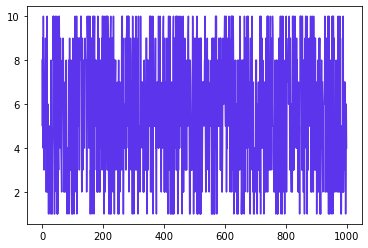

In [216]:
#First of all let's generate and plot some random noise. The next value in the sequence is generated randomly,
#i.e independent of the previous value.

normal_rand = [random.randint(1,10) for i in range(1000)]
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(range(1000),normal_rand, color="#5b34eb")

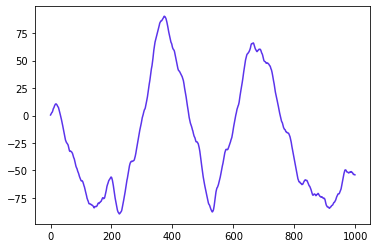

In [217]:
#And now the visualization of Perlin Noise. Instead of setting the value as the random number,
#a random number is added to a "momentum" variable which is then added to the previously generated
#value in order to create the next value in the sequence. 
#The range of the random momentum modifier variable is dynamic depending on how close both the momentum value 
#and the generated values are to their set boundaries.

perlin_rand = []
old = 0
moment = 0
mom = []
for i in range(1000):
    moment += (random.random()-0.5) + ((-(moment**3))/100) + ((-(old**3))/10**7)
    old = old + moment
    perlin_rand.append(old)
    mom.append(moment)
plt.rcParams["figure.figsize"] = (6,4)    
plt.plot(range(1000),perlin_rand, color="#5b34eb")

<a name="perlin_2d"></a>
## 4. Perlin 2D

Let's consider 2D Perlin noise, i.e. noise = f(x,y), a scalar value for any point in 2D. A grid is laid out where the lines represent intenger values of x and y:


<a href="https://imgur.com/JG8QMLe"><img src="https://i.imgur.com/JG8QMLe.png" title="source: imgur.com" style="width:270px" alt="Fig. 1"/></a>
$$Fig. 1$$
$$noise = f(x,y)$$
(Fig.1) For every grid point, we create a random gradient vector. This is a vector (typically of uniform length, e.g. 1) pointing in a random direction from the grid point. The grid points and gradient vectors are shown in purple in the graph above. The vectors are called gradients because the noise function will have a positive slope (i.e. will increase) in the direction of each gradient vector.


<a href="https://imgur.com/KmHStzf"><img src="https://i.imgur.com/KmHStzf.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 2$$
(Fig.2) For every pixel P that we need to compute noise for, we evaluate a function using the four neighboring grid points Q and their gradient vectors. Here the pixel we're computing is marked as a cyan dot, the four surrounding grid points are marked as purple dots, and their gradient vectors are again shown in purple.


<a href="https://imgur.com/Lr9IsMH"><img src="https://i.imgur.com/Lr9IsMH.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 3$$
(Fig. 3) For each neighboring grid point Q, we take the dot product of the gradient G at Q with the difference vector (P - Q). The result of the dot product (with easing) contributes toward the noise value at P. Here the difference vectors (P - Q) are shown in pink.

<a href="https://imgur.com/b02iR4u"><img src="https://i.imgur.com/b02iR4u.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 4$$
(Fig. 4) Here is the raw contribution of one gradient vector G on its four surrounding grid squares, based on its dot product with the difference vector (P - Q) from the grid point Q to each pixel P. A positive value is yellow; negative is blue.

<a href="https://imgur.com/dH5WGEN"><img src="https://i.imgur.com/dH5WGEN.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 5$$
(Fig. 5) Here is the same contribution, multiplied by an eased dropoff filter (and scaled up for visibility). The dropoff filter, applied for x and y axes, is:

$$fade(1 - abs(P.x - Q.x)) · fade(1 - abs(P.y - Q.y))$$

Where:
$$fade(t) = 3t2 - 2t3$$   

<a href="https://imgur.com/1ttg48J"><img src="https://i.imgur.com/1ttg48J.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 6$$
(Fig. 6)The above fade function has a zero first derivative at t=0 and t=1, the borders of each grid cell. That makes it look continuous when the Perlin noise result is used as a color or opacity. But if the noise is used for a normal map, for example, you need the 2nd derivative to be zero (and therefore continuous) at the borders in order to avoid unsightly discontinuities. Hence the "improved" fade/dropoff filter (interpolant function) that has zero 2nd derivative at t=0 and t=1.

Where:
$$fade(t) = 6t5 - 15t4 + 10t3$$   

<a href="https://imgur.com/uHFXT6J"><img src="https://i.imgur.com/uHFXT6J.png" title="source: imgur.com" /></a>
$$Fig. 7$$
(Fig. 7) Here is the noise field with the contributions from different gradients overlapping (summing).

#### This is the first time I work on  a project like this... it's exciting! 

In [218]:
def generate_unit_vectors(n):
    'Generates matrix NxN of unit length vectors'
    phi = np.random.uniform(0, 2*np.pi, (n, n))
    v = np.stack((np.cos(phi), np.sin(phi)), axis=-1)
    return v


# quintic interpolation
def qz(t):
    return t * t * t * (t * (t * 6 - 15) + 10)


# cubic interpolation
def cz(t):
    return -2 * t * t * t + 3 * t * t


def generate_2D_perlin_noise(size, ns):
    '''
    Parameters
    ----------
    size : int
        Size of 2D array size x size.
    ns : int
        Distance between nodes.

    Returns
    -------
    m : ndarray
        The 2D array filled with Perlin noise.
    '''
    nc = int(size / ns)  # number of nodes
    grid_size = int(size / ns + 1)  # number of points in grid

    # generate grid of vectors
    v = generate_unit_vectors(grid_size)

    # generate some constans in advance
    ad, ar = np.arange(ns), np.arange(-ns, 0, 1)

    # vectors from each of the 4 nearest nodes to a point in the NSxNS patch
    vd = np.zeros((ns, ns, 4, 1, 2))
    for (l1, l2), c in zip(product((ad, ar), repeat=2), count()):
        vd[:, :, c, 0] = np.stack(np.meshgrid(l2, l1, indexing='xy'), axis=2)

    # interpolation coefficients
    d = qz(np.stack((np.zeros((ns, ns, 2)),
                     np.stack(np.meshgrid(ad, ad, indexing='ij'), axis=2)),
           axis=2) / ns)
    d[:, :, 0] = 1 - d[:, :, 1]
    
    # make copy and reshape for convenience
    d0 = d[..., 0].copy().reshape(ns, ns, 1, 2)
    d1 = d[..., 1].copy().reshape(ns, ns, 2, 1)

    # make an empy matrix
    m = np.zeros((size, size))
    # reshape for convenience
    t = m.reshape(nc, ns, nc, ns)

    # calculate values for a NSxNS patch at a time
    for i, j in product(np.arange(nc), repeat=2):  # loop through the grid
        # get four node vectors
        av = v[i:i+2, j:j+2].reshape(4, 2, 1)
        # 'vector from node to point' dot 'node vector'
        at = np.matmul(vd, av).reshape(ns, ns, 2, 2)
        # horizontal and vertical interpolation
        t[i, :, j, :] = np.matmul(np.matmul(d0, at), d1).reshape(ns, ns)

    return m

### Let's make some noise! 

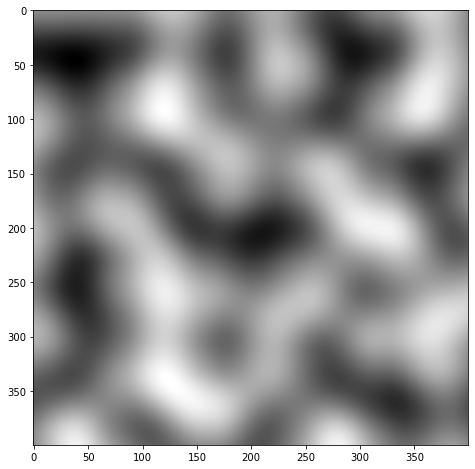

In [219]:
img1 = generate_2D_perlin_noise(400, 80)
plt.rcParams["figure.figsize"] = (10,8)
plt.imshow(img1, cmap='gray')

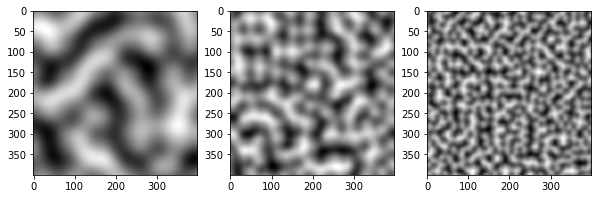

In [220]:
'''
Now let's tweak the size of the array
and the distance between the nodes,
to change the granularity and plot 
different variations of Perlin noise.
'''

img1 = generate_2D_perlin_noise(400, 80)
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')

img2 = generate_2D_perlin_noise(400, 40)
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')

img3 = generate_2D_perlin_noise(400, 20)
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')

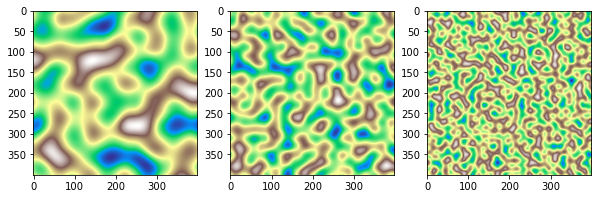

In [221]:
'''
By changing the cmap parameter we can
obtain countless possibilities of how to
visualize the noise (in this case as terrain).
'''

img4 = generate_2D_perlin_noise(400, 80)
plt.subplot(1, 3, 1)
plt.imshow(img4, cmap='terrain')

img5 = generate_2D_perlin_noise(400, 40)
plt.subplot(1, 3, 2)
plt.imshow(img5, cmap='terrain')

img6 = generate_2D_perlin_noise(400, 20)
plt.subplot(1, 3, 3)
plt.imshow(img6, cmap='terrain')



#### Looks cool, right? (Never played Minecraft, but now I can think of how things work with the terrain in similar games).

### Just to play a little! 

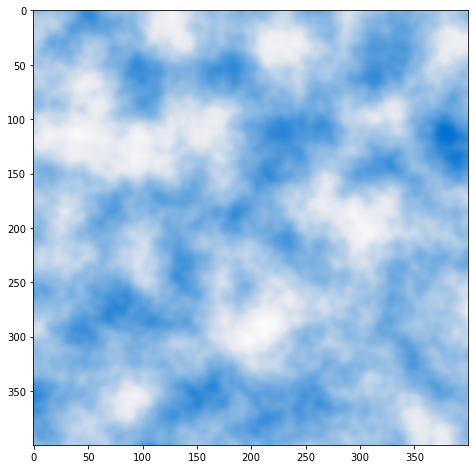

In [222]:
'''
One famous inplementation of Perlin Noise
is to generate artificial clouds. (Quite
realistic I'll say!)
The sky is made of four images generated with grids of different size.
'''
# generate "sky"
img7 = generate_2D_perlin_noise(400, 80)
img8 = generate_2D_perlin_noise(400, 40)
img9 = generate_2D_perlin_noise(400, 20)
img10 = generate_2D_perlin_noise(400, 10)

img = (img7 + img8 + img9 + img10) / 4

cmap = LinearSegmentedColormap.from_list('sky',
                                        [(0, '#0572D1'),
                                         (0.75, '#E5E8EF'),
                                         (1, '#FCFCFC')])
img = cm.ScalarMappable(cmap=cmap).to_rgba(img)
plt.rcParams["figure.figsize"] = (10,8)
plt.imshow(img)

<a name="perlin_3d"></a>
## C. Perlin 3D

#### This is the most fun part for me, creating realistic landmass in 3D. This part of the project is inspired by JackMckew's Blog (check Resources)

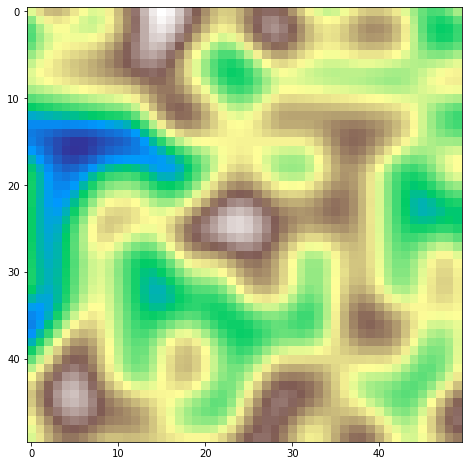

In [229]:
'''
We will be using noise package
and first of all we will create the
required settings for the function
'''

shape = (50,50)
scale = 100.0
octaves = 10
persistence = 0.5
lacunarity = 10.0

'''
Now to generate our 2D terrain! We initialise a numpy array,
that will contain the values of our world.
'''

world = np.zeros(shape)

        
'''
As we initalise the array with all zero values, 
now it is time to iterate through the empty array 
and fill it with Perlin Noise!
'''

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=42)

'''
We have now initialised our 2D array 
with all the values inside for our terrain. 
Since we are mimicking topography, 
let's use the 'terrain' colormap to plot it. 
'''

matplotlib.pyplot.imshow(world,cmap='terrain')

#### Looks great, isn't it?

'\nHere it is! \n'

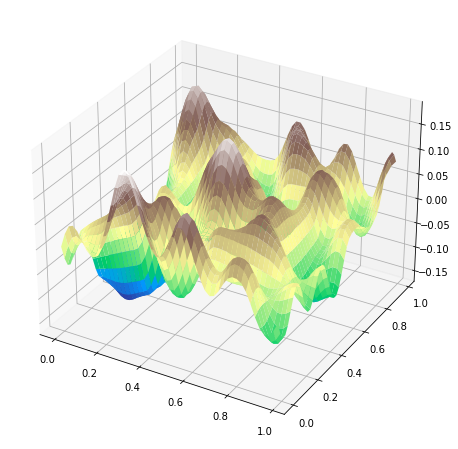

In [230]:
'''
For plotting this in 3 dimensions, 
we must initialise 2 more arrays 
which will contain the x-y co-ordinates of our world.
'''

lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

'''
Now it's time to plot in 3D with matplotlib!
'''

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')

'''
Here it is! 
'''

This will be the end of my exploration for this project. Feel free to use the code and improvise. Change settings, see different results. Play with it, and learn as much as you can. Perlin noise is amazing!

<a name="resources"></a>
## 3. Resources

Most sincere thanks to all the people that contrinuted to the exploration of Perlin Noise, It has been a great learning for me! Hope You've enjoyed my work.

1. [Perlin noise Wiki](https://en.wikipedia.org/wiki/Perlin_noise)
2. [Adrian's soapbox](http://adrianb.io/2014/08/09/perlinnoise.html)
3. [Jack McKew's Blog](https://jackmckew.dev/3d-terrain-in-python.html)
4. [Scratchapixel 2.0](https://www.scratchapixel.com/lessons/procedural-generation-virtual-worlds/perlin-noise-part-2/perlin-noise-computing-derivatives)